In [ ]:
import os, shutil, pickle, cv2
from matplotlib import pyplot as plt
import numpy as np

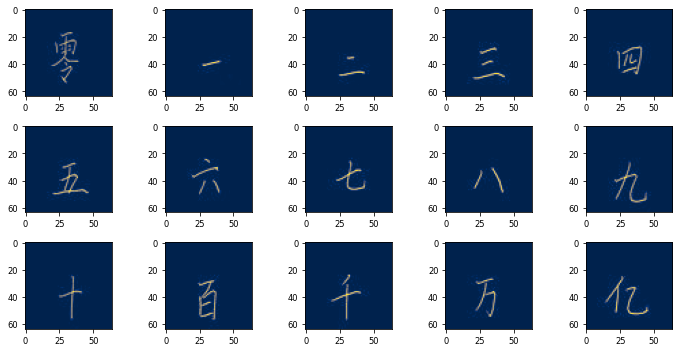

In [ ]:
# Viewing first 15 images from first volunteer

images = []
for i in range(15):
  num = i + 1
  img_file = 'input_1_1_' + str(num) + '.jpg'
  img = cv2.imread(img_file, 0)
  images.append(img)

figure = plt.figure(figsize=(10,5))
rows = 3
cols = 5
for i in range(rows*cols):
  ax = figure.add_subplot(rows, cols, i+1)
  ax.tick_params(labelsize='small')
  plt.imshow(images[i], cmap='cividis')
figure.tight_layout()    
plt.show()

In [ ]:
# Data PreProcessing (1)
# Create 3 Directories for Train, Validation and Test, and 15 Class Labels Sub-Directories within each Directory

original_dataset_directory = '/Chinese_MNIST/data'
base_directory = '/Chinese_MNIST'

train_dir = os.path.join(base_directory, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_directory, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_directory, "test")
os.mkdir(test_dir)

for i in range(15):
  train_sub_dir = os.path.join(train_dir, str(i))
  os.mkdir(train_sub_dir)
  validation_sub_dir = os.path.join(validation_dir, str(i))
  os.mkdir(validation_sub_dir)
  test_sub_dir = os.path.join(test_dir, str(i))
  os.mkdir(test_sub_dir)  

In [ ]:
# Data PreProcessing (2)
# Transfer files to respective sub-directories with 800 to Train, 150 to Validation and 50 to Test

categories = [[] for i in range(15)]
files = os.listdir(original_dataset_directory)
for file in files:
    split_name = file.split("_")
    code = int(split_name[-1].split(".")[0]) - 1
    categories[code].append(file)

for label, category in enumerate(categories):
  for i in range(800): 
    source = os.path.join(original_dataset_directory, category[i])
    destination_folder = train_dir + "/" + str(label)
    destination = os.path.join(destination_folder, category[i])
    shutil.copyfile(source, destination)
    
  for i in range(800, 950):
    source = os.path.join(original_dataset_directory, category[i])
    destination_folder = validation_dir + "/" + str(label)
    destination = os.path.join(destination_folder, category[i])
    shutil.copyfile(source, destination)
    
  for i in range(950, 1000):
    source = os.path.join(original_dataset_directory, category[i])
    destination_folder = test_dir + "/" + str(label)
    destination = os.path.join(destination_folder, category[i])
    shutil.copyfile(source, destination)

In [ ]:
# Data PreProcessing (3)
# Prepare numpy arrays for Train, Validation and Test datasets

train_data = []
for i in range(15):  
  folder = train_dir + "/" + str(i)
  for filename in os.listdir(folder):
    filepath = folder + "/" + filename
    img = cv2.imread(filepath, 0)
    img_array = np.asarray(img)
    train_data.append(img_array)

validation_data = []
for i in range(15):  
  folder = validation_dir + "/" + str(i)
  for filename in os.listdir(folder):
    filepath = folder + "/" + filename
    img = cv2.imread(filepath, 0)
    img_array = np.asarray(img)
    validation_data.append(img_array)

test_data = []
for i in range(15):  
  folder = test_dir + "/" + str(i) 
  for filename in os.listdir(folder):
    filepath = folder + "/" + filename
    img = cv2.imread(filepath, 0)
    img_array = np.asarray(img)
    test_data.append(img_array)

train_data = np.asarray(train_data)
validation_data = np.asarray(validation_data)
test_data = np.asarray(test_data)

In [ ]:
# Data PreProcessing (4)
# Prepare numpy arrays for Train, Validation and Test Labels

train_labels = []
for i in range(15):
  for j in range(800):
      train_labels.append(i)

validation_labels = []
for i in range(15):
  for j in range(150):
      validation_labels.append(i)

test_labels = []
for i in range(15):
  for j in range(50):
      test_labels.append(i)

train_labels = np.asarray(train_labels)
validation_labels = np.asarray(validation_labels)
test_labels = np.asarray(test_labels)

In [ ]:
# Data PreProcessing (5) 
# Save Train, Validation and Test dataset and Labels  

with open('chinesemnist.pickle', 'wb') as f:
  pickle.dump([train_data, train_labels, validation_data, validation_labels, test_data, test_labels], f)
  

In [ ]:
# Model 1 (Dense Model) (1)
# Check Data Shape

print(len(train_data), len(train_labels))
print(len(validation_data), len(validation_labels))
print(len(test_data), len(test_labels))
print("Train Data Shape:", train_data.shape, " Train Labels Shape:", train_labels.shape)
print("Validation Data Shape: ", validation_data.shape, " Validation Labels Shape:", validation_labels.shape)
print("Test Data Shape:", test_data.shape, " Test Labels Shape:", test_labels.shape)

12000 12000
2250 2250
750 750
Train Data Shape: (12000, 64, 64)  Train Labels Shape: (12000,)
Validation Data Shape:  (2250, 64, 64)  Validation Labels Shape: (2250,)
Test Data Shape: (750, 64, 64)  Test Labels Shape: (750,)


In [ ]:
# Model 1 (Dense Model) (2)
# Reshape Data to fit the first Dense layer of Model 1

mod1_train_data = train_data.reshape((12000, 64 * 64))
mod1_train_data = mod1_train_data.astype('float32')/255
mod1_validation_data = validation_data.reshape((2250, 64 * 64))
mod1_validation_data = mod1_validation_data.astype('float32')/255
mod1_test_data = test_data.reshape((750, 64 * 64))
mod1_test_data = mod1_test_data.astype('float32')/255

print("Model_1 Train Data Shape:", mod1_train_data.shape)
print("Model_1 Validation Data Shape:", mod1_validation_data.shape)
print("Model_1 Test Data Shape:", mod1_test_data.shape)

Model_1 Train Data Shape: (12000, 4096)
Model_1 Validation Data Shape: (2250, 4096)
Model_1 Test Data Shape: (750, 4096)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:
# Model 1 (Dense Model) (3)
# Build Model 1

mod1_inputs = keras.Input(shape=(4096,))
dense = layers.Dense(512, activation='relu')
x = dense(mod1_inputs)
x = layers.Dense(64, activation = 'relu')(x)
mod1_outputs = layers.Dense(15, activation='softmax')(x)

model_1 = keras.Model(inputs=mod1_inputs, outputs=mod1_outputs, name="Chinese_MNIST_Model_1")
model_1.summary()

Model: "Chinese_MNIST_Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               2097664   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 15)                975       
Total params: 2,131,471
Trainable params: 2,131,471
Non-trainable params: 0
_________________________________________________________________


In [ ]:
keras.utils.plot_model(model_1, "Model_1.jpg")

In [ ]:
# Model 1 (Dense Model) (4)
# Compile and fit Model 1

model_1.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['sparse_categorical_accuracy'])
history_1 = model_1.fit(mod1_train_data, train_labels, epochs=20, validation_data=(mod1_validation_data, validation_labels))

Epoch 1/20
375/375 [==============================] - 9s 25ms/step - loss: 1.6072 - sparse_categorical_accuracy: 0.5050 - val_loss: 1.0030 - val_sparse_categorical_accuracy: 0.6809
Epoch 2/20
375/375 [==============================] - 9s 25ms/step - loss: 0.7169 - sparse_categorical_accuracy: 0.7725 - val_loss: 0.7074 - val_sparse_categorical_accuracy: 0.7898
Epoch 3/20
375/375 [==============================] - 9s 24ms/step - loss: 0.4065 - sparse_categorical_accuracy: 0.8726 - val_loss: 0.6746 - val_sparse_categorical_accuracy: 0.8227
Epoch 4/20
375/375 [==============================] - 9s 24ms/step - loss: 0.2528 - sparse_categorical_accuracy: 0.9225 - val_loss: 0.6674 - val_sparse_categorical_accuracy: 0.8271
Epoch 5/20
375/375 [==============================] - 9s 24ms/step - loss: 0.1621 - sparse_categorical_accuracy: 0.9498 - val_loss: 0.7979 - val_sparse_categorical_accuracy: 0.8169
Epoch 6/20
375/375 [==============================] - 9s 24ms/step - loss: 0.1062 - sparse_cate

In [ ]:
history_1_dict = history_1.history
history_1_dict.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

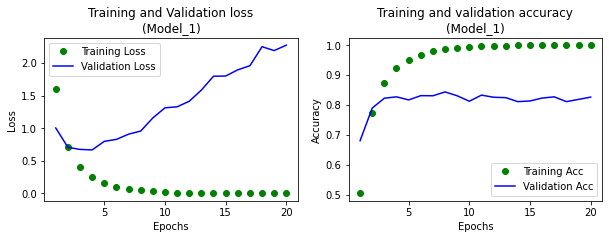

In [ ]:
# Model 1 (Dense Model) (5)
# Plot Training and Validation Loss & Accuracy

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
loss_1_values = history_1_dict['loss']
val_loss_1_values = history_1_dict['val_loss']
epochs = range(1, len(loss_1_values) + 1)
plt.plot(epochs, loss_1_values, 'bo', color='green', label='Training Loss')
plt.plot(epochs, val_loss_1_values, 'b', label='Validation Loss')
plt.title('Training and Validation loss\n(Model_1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
acc_1 = history_1_dict['sparse_categorical_accuracy']
val_acc_1 = history_1_dict['val_sparse_categorical_accuracy']
plt.plot(epochs, acc_1, 'bo', color='green', label='Training Acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation Acc')
plt.title('Training and validation accuracy\n(Model_1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Model 1 (Dense Model) (6)
# Re-Build, Compile and Fit Model 1

model_1_refined = keras.Model(inputs=mod1_inputs, outputs=mod1_outputs, name="Chinese_MNIST_Model_1_Refined")
model_1_refined.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['sparse_categorical_accuracy'])
history_1_refined = model_1_refined.fit(mod1_train_data, train_labels, epochs=4, validation_data=(mod1_validation_data, validation_labels))

Epoch 1/4
375/375 [==============================] - 9s 25ms/step - loss: 4.3230e-04 - sparse_categorical_accuracy: 0.9998 - val_loss: 2.4570 - val_sparse_categorical_accuracy: 0.8178
Epoch 2/4
375/375 [==============================] - 9s 24ms/step - loss: 9.8345e-04 - sparse_categorical_accuracy: 0.9997 - val_loss: 2.4792 - val_sparse_categorical_accuracy: 0.8209
Epoch 3/4
375/375 [==============================] - 9s 24ms/step - loss: 7.4633e-04 - sparse_categorical_accuracy: 0.9998 - val_loss: 2.5380 - val_sparse_categorical_accuracy: 0.8160
Epoch 4/4
375/375 [==============================] - 9s 24ms/step - loss: 1.9893e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.6271 - val_sparse_categorical_accuracy: 0.8236


In [ ]:
model_1_refined.save('Chinese_MNIST_Model_1.h5')

In [ ]:
# Model 1 (Dense Model) (7)
# Evaluate Model 1 on Test Data 

results_1 = model_1_refined.evaluate(mod1_test_data, test_labels)

24/24 [==============================] - 0s 5ms/step - loss: 1.3316 - sparse_categorical_accuracy: 0.8360


In [ ]:
# Model 1 (Dense Model) (8)
# Model 1's Predictions on Random Extracted Test Data

test_images_extract = []
img_1 = cv2.imread('input_10_7_1.jpg', 0)
img_2 = cv2.imread('input_10_7_2.jpg', 0)
img_3 = cv2.imread('input_10_5_3.jpg', 0)
img_4 = cv2.imread('input_10_6_4.jpg', 0)
img_5 = cv2.imread('input_11_1_5.jpg', 0)
img_6 = cv2.imread('input_11_1_6.jpg', 0)
img_7 = cv2.imread('input_11_1_7.jpg', 0)
img_8 = cv2.imread('input_11_3_8.jpg', 0)
img_9 = cv2.imread('input_11_5_9.jpg', 0)
img_10 = cv2.imread('input_13_7_10.jpg', 0)
img_11 = cv2.imread('input_15_3_11.jpg', 0)
img_12 = cv2.imread('input_13_10_12.jpg', 0)
img_13 = cv2.imread('input_12_5_13.jpg', 0)
img_14 = cv2.imread('input_15_10_14.jpg', 0)
img_15 = cv2.imread('input_11_6_15.jpg', 0)

test_images_extract.append(img_1)
test_images_extract.append(img_2)
test_images_extract.append(img_3)
test_images_extract.append(img_4)
test_images_extract.append(img_5)
test_images_extract.append(img_6)
test_images_extract.append(img_7)
test_images_extract.append(img_8)
test_images_extract.append(img_9)
test_images_extract.append(img_10)
test_images_extract.append(img_11)
test_images_extract.append(img_12)
test_images_extract.append(img_13)
test_images_extract.append(img_14)
test_images_extract.append(img_15)

In [ ]:
test_images_extract_reshape = []

for character in test_images_extract:
  character = character.reshape(1, 64*64)
  character = character.astype('float32')/255
  test_images_extract_reshape.append(character)
  
for character in test_images_extract_reshape:
  print(model_1_refined.predict(character))
  print(np.argmax(model_1.predict(character)), "\n")

[[1.6073476e-07 0.0000000e+00 0.0000000e+00 3.9645896e-16 6.8633274e-16
  2.6971425e-11 1.8527859e-09 1.0491811e-18 3.6824412e-32 9.6626638e-07
  1.7534088e-21 1.4415346e-03 9.9844813e-01 1.0922648e-04 4.7487162e-26]]
12 

[[0.0000000e+00 9.9885583e-01 1.1441136e-03 5.7415095e-23 7.9654559e-24
  6.3158074e-30 2.4738496e-25 1.0852336e-21 1.2144768e-21 1.3004841e-38
  6.8921801e-18 0.0000000e+00 2.6409778e-22 0.0000000e+00 1.5195515e-29]]
1 

[[0.00000000e+00 1.28935385e-21 9.99494076e-01 5.05929405e-04
  9.70435346e-27 2.16454679e-14 4.67360062e-09 1.27356960e-13
  6.23915888e-24 2.95679519e-26 1.21721755e-25 7.41472449e-32
  1.16410327e-17 0.00000000e+00 1.01071146e-25]]
2 

[[0.0000000e+00 3.1706576e-31 6.2537658e-01 3.4234914e-01 4.2831015e-25
  1.1103414e-10 3.2274287e-02 5.2490702e-24 4.0539460e-13 1.6330892e-27
  2.0269023e-32 8.8634823e-29 6.4176914e-17 3.2940736e-29 1.4266327e-23]]
2 

[[1.5015016e-01 0.0000000e+00 0.0000000e+00 3.1208154e-28 8.4922105e-01
  1.1181944e-10 1.2180

In [ ]:
# Model 2 (Covnet-MaxPooling-Dense Model) (1)
# Check Data Shape

print(len(train_data), len(train_labels))
print(len(validation_data), len(validation_labels))
print(len(test_data), len(test_labels))
print("Train Data Shape:", train_data.shape, " Train Labels Shape:", train_labels.shape)
print("Validation Data Shape: ", validation_data.shape, " Validation Labels Shape:", validation_labels.shape)
print("Test Data Shape:", test_data.shape, " Test Labels Shape:", test_labels.shape)

12000 12000
2250 2250
750 750
Train Data Shape: (12000, 64, 64)  Train Labels Shape: (12000,)
Validation Data Shape:  (2250, 64, 64)  Validation Labels Shape: (2250,)
Test Data Shape: (750, 64, 64)  Test Labels Shape: (750,)


In [ ]:
# Model 2 (Covnet-MaxPooling-Dense Model) (2)
# Reshape Data to fit the first Convnet layer of Model 2

mod2_train_data = np.expand_dims(train_data, axis=3) 
mod2_train_data = mod2_train_data.astype('float32')/255
mod2_validation_data = np.expand_dims(validation_data, axis=3) 
mod2_validation_data = mod2_validation_data.astype('float32')/255
mod2_test_data = np.expand_dims(test_data, axis=3)  
mod2_test_data = mod2_test_data.astype('float32')/255

print("Model_2 Train Data Shape:", mod2_train_data.shape)
print("Model_2 Validation Data Shape:", mod2_validation_data.shape)
print("Model_2 Test Data Shape:", mod2_test_data.shape)

Model_2 Train Data Shape: (12000, 64, 64, 1)
Model_2 Validation Data Shape: (2250, 64, 64, 1)
Model_2 Test Data Shape: (750, 64, 64, 1)


In [ ]:
# Model 2 (Covnet-MaxPooling-Dense Model) (3)
# Build Model 2

mod2_inputs = keras.Input(shape=(64,64,1))
conv2D = layers.Conv2D(128, (3,3), activation='relu')
x = conv2D(mod2_inputs)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(128, (3,3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(256, (3,3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(512, (3,3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
mod2_outputs = layers.Dense(15, activation='softmax')(x)

model_2 = keras.Model(inputs=mod2_inputs, outputs=mod2_outputs, name="Chinese_MNIST_Model_2")
model_2.summary()

Model: "Chinese_MNIST_Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256

In [ ]:
keras.utils.plot_model(model_2, "Model_2.jpg")

In [ ]:
# Model 2 (Covnet-MaxPooling-Dense Model) (4)
# Compile and fit Model 2

model_2.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['sparse_categorical_accuracy'])
history_2 = model_2.fit(mod2_train_data, train_labels, epochs=30, validation_data=(mod2_validation_data, validation_labels))

Epoch 1/30
375/375 [==============================] - 6s 15ms/step - loss: 1.0931 - sparse_categorical_accuracy: 0.6235 - val_loss: 0.2729 - val_sparse_categorical_accuracy: 0.9044
Epoch 2/30
375/375 [==============================] - 6s 15ms/step - loss: 0.1950 - sparse_categorical_accuracy: 0.9347 - val_loss: 0.2862 - val_sparse_categorical_accuracy: 0.9262
Epoch 3/30
375/375 [==============================] - 6s 15ms/step - loss: 0.1011 - sparse_categorical_accuracy: 0.9682 - val_loss: 0.0411 - val_sparse_categorical_accuracy: 0.9853
Epoch 4/30
375/375 [==============================] - 6s 15ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9798 - val_loss: 0.0290 - val_sparse_categorical_accuracy: 0.9907
Epoch 5/30
375/375 [==============================] - 6s 15ms/step - loss: 0.0749 - sparse_categorical_accuracy: 0.9808 - val_loss: 0.1965 - val_sparse_categorical_accuracy: 0.9618
Epoch 6/30
375/375 [==============================] - 6s 15ms/step - loss: 0.0637 - sparse_cate

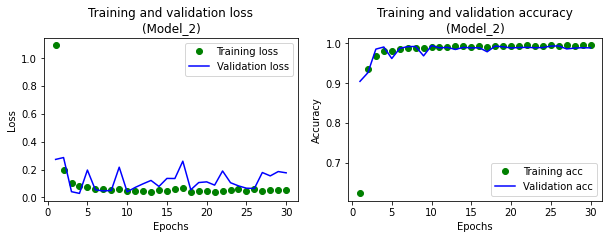

In [ ]:
# Model 2 (Covnet-MaxPooling-Dense Model) (5)
# Plot Training and Validation Loss and Accuracy

history_2_dict = history_2.history
history_2_dict.keys()

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
loss_2_values = history_2_dict['loss']
val_loss_2_values = history_2_dict['val_loss']
epochs = range(1, len(loss_2_values) + 1)
plt.plot(epochs, loss_2_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_2_values, 'b', label='Validation loss')
plt.title('Training and validation loss\n(Model_2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
acc_2 = history_2_dict['sparse_categorical_accuracy']
val_acc_2 = history_2_dict['val_sparse_categorical_accuracy']
plt.plot(epochs, acc_2, 'bo', color='green', label='Training acc')
plt.plot(epochs, val_acc_2, 'b', label='Validation acc')
plt.title('Training and validation accuracy\n(Model_2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Model 2 (Covnet-MaxPooling-Dense Model) (6)
# Re-build, compile and fit Model 2

model_2_refined = keras.Model(inputs=mod2_inputs, outputs=mod2_outputs, name="Chinese_MNIST_Model_2_Refined")
model_2_refined.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['sparse_categorical_accuracy'])
history_2_refined = model_2_refined.fit(mod2_train_data, train_labels, epochs=4, validation_data=(mod2_validation_data, validation_labels))

Epoch 1/4
375/375 [==============================] - 6s 16ms/step - loss: 0.0555 - sparse_categorical_accuracy: 0.9948 - val_loss: 0.3189 - val_sparse_categorical_accuracy: 0.9844
Epoch 2/4
375/375 [==============================] - 6s 15ms/step - loss: 0.0402 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.1638 - val_sparse_categorical_accuracy: 0.9907
Epoch 3/4
375/375 [==============================] - 6s 15ms/step - loss: 0.0508 - sparse_categorical_accuracy: 0.9946 - val_loss: 0.2554 - val_sparse_categorical_accuracy: 0.9880
Epoch 4/4
375/375 [==============================] - 6s 15ms/step - loss: 0.0573 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.1031 - val_sparse_categorical_accuracy: 0.9911


In [ ]:
model_2_refined.save('Chinese_MNIST_Model_2.h5')

In [ ]:
# Model 2 (Covnet-MaxPooling-Dense Model) (7)
# Evaluate Model 2 on Test Data

results_2 = model_2_refined.evaluate(mod2_test_data, test_labels)

24/24 [==============================] - 0s 10ms/step - loss: 0.1043 - sparse_categorical_accuracy: 0.9907


In [ ]:
# Model 2 (Covnet-MaxPooling-Dense Model) (8)
# Model 2's Predictions on Random Extracted Test Data

test_images_extract_reshape_mod2 = []

for character in test_images_extract:
  character = character.astype('float32')/255
  character = np.expand_dims(character, axis=0)
  character = np.expand_dims(character, axis=-1)
  test_images_extract_reshape_mod2.append(character)

for character in test_images_extract_reshape_mod2:
  print(model_2_refined.predict(character))
  print(np.argmax(model_2_refined.predict(character)), "\n")

[[1.0000000e+00 0.0000000e+00 6.1495989e-38 1.4664675e-26 4.9691322e-29
  4.3603427e-20 3.2114362e-21 2.1974969e-38 5.1928251e-30 4.3794152e-19
  7.1416935e-30 6.4808934e-15 4.0138898e-34 9.6556504e-16 1.8950420e-36]]
0 

[[1.04942445e-35 1.00000000e+00 1.22689123e-14 1.12707728e-32
  7.60569524e-28 6.97000206e-31 4.95222990e-23 7.36883044e-19
  1.16529214e-25 4.28513202e-21 7.23297455e-20 1.68032032e-25
  3.11892146e-19 2.48016581e-22 4.99022562e-26]]
1 

[[0.00000000e+00 1.14886805e-18 1.00000000e+00 1.58085134e-12
  3.16801001e-36 2.01409569e-34 6.85694082e-17 8.12094732e-25
  4.48397689e-24 1.05947255e-27 1.92294411e-24 2.26811031e-37
  2.62789626e-28 3.19378196e-29 4.53486952e-35]]
2 

[[0.0000000e+00 0.0000000e+00 4.6589762e-22 1.0000000e+00 0.0000000e+00
  2.4719691e-28 0.0000000e+00 1.4252952e-35 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
3 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
4 

[[0.0000000e+00 0.0000000